## Llcolorizer

In this notebook we are going to be adding color to a gray scale image and also detect skin. Using opencv library, we read an image, detect skin in the image and finally add color to the image.

import all necessary libraries

In [161]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Read in the image

In [162]:
image_path = "teju.jpg"
test_image = cv2.imread(image_path)

Plot the image

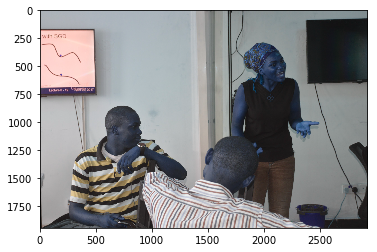

In [163]:
plt.imshow(test_image)

it's in RGB format converting it to BGR

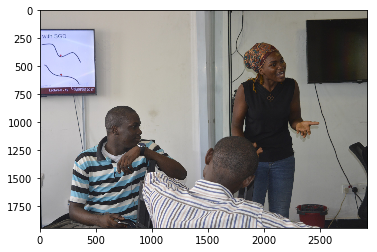

In [164]:
test_image = cv2.cvtColor(test_image, cv2.COLOR_RGB2BGR)

# COnverting the image to gray
gray = cv2.cvtColor(test_image, cv2.COLOR_RGB2GRAY)

#Plotting the image
plt.imshow(test_image)

Skin Detection


In [165]:
# Defining the lower and upper boundaries of the HSV pixel
# Intensitiews to be considered as skin
lower = np.array([0, 48, 80], dtype= "uint8")
upper = np.array([20, 255, 255], dtype= "uint8")

# convert image to HSv
test_imageHSV = cv2.cvtColor(test_image, cv2.COLOR_RGB2HSV)
skin_image = cv2.inRange(test_imageHSV, lower, upper)

#mask the frame
skin = cv2.bitwise_and(test_imageHSV, test_imageHSV, skin_image)

In [166]:
# apply a series of erosions and dilations to the mask
# using an elliptical kernel
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11, 11))
skin_image = cv2.erode(skin_image, kernel, iterations = 2)
skin_image = cv2.dilate(skin_image, kernel, iterations = 2)

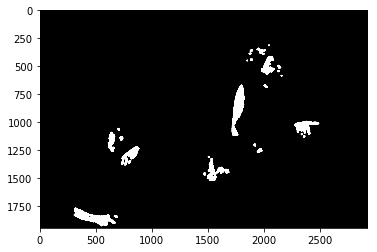

In [167]:
# blur the mask to help remove noise, then apply the
# mask to the frame
skin_image = cv2.GaussianBlur(skin_image, (3, 3), 0)
# Plot the image
plt.imshow(skin_image, cmap="gray")

Adding color to a gray scale image 

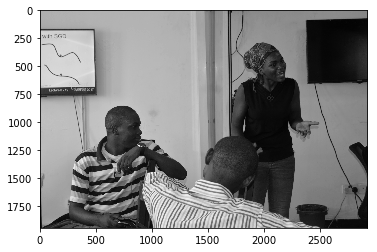

In [170]:
# PLotting the gray scale image
plt.imshow(gray, cmap="gray")

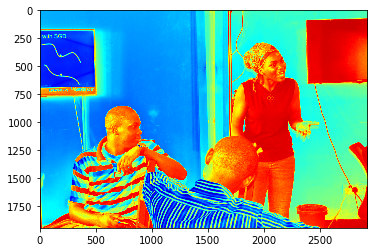

In [171]:
image_cm = cv2.applyColorMap(gray, cv2.COLORMAP_JET)
plt.imshow(image_cm)
